# Predictive_Modelling_&_Evaluation

Predictive Modelling can be proceduralized as follows;

1. <a href='#train_test_split_section'><b>Train-Test Split</b></a>
2. <a href='#model_building_and_predicting_section'><b>Model Building And Predicting</b></a>
   - 2.1. <a href='#linear_regression_section'><b>Linear Regression</b></a>
   - 2.2. <a href='#knn_section'><b>K-Nearest Neighbors Regression</b></a>
   - 2.3. <a href='#rf_section'><b>Random Forest Regression</b></a>
   - 2.4. <a href='#tree_section'><b>Decision Tree Regression</b></a>
   - 2.5. <a href='#ridge_section'><b>Ridge Regression</b></a>
   - 2.6. <a href='#gaussian_section'><b>Gaussian Regression</b></a>
3. <a href='#evaluating_section'><b>Evaluating</b></a>
4. <a href='#assumption_control_section'><b>Assumption Control</b></a>

---

## Data Read

In [1]:
# Import necessary libraries for data obtaining
import pandas as pd

In [2]:
# Read the data into a data frame
transformed_data = pd.read_csv('SCALED_Google_Stock_Price_Dataset.csv')

In [3]:
transformed_data.head()

,Date,Open,High,Low,Adj_Close,Volume,Close
0,2004-08-19,0.000135,0.000386,0.000000,0.000055,0.543577,0.000055
1,2004-08-20,0.000303,0.001222,0.000767,0.001395,0.277886,0.001395
2,2004-08-23,0.001927,0.001955,0.002210,0.001578,0.222151,0.001578
3,2004-08-24,0.002009,0.001642,0.001285,0.000817,0.185523,0.000817
4,2004-08-25,0.000962,0.001042,0.001337,0.001007,0.111765,0.001007


In [4]:
transformed_data.shape

(4856, 7)

---

<a id='train_test_split_section'></a>
## 1. Train-Test Split

In [5]:
# Necessary library
from sklearn.model_selection import train_test_split

In [6]:
transformed_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Close'], dtype='object')

In [7]:
# Predictors
X = transformed_data[['Open', 'High', 'Low', 'Adj_Close', 'Volume']]
# Target
Y = transformed_data[['Close']]

In [8]:
# Splitting dataset into train and test datasets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)


In [9]:
print('Shape of train_x: ', train_x.shape)
print('Shape of train_y: ', train_y.shape)
print('Shape of test_x: ', test_x.shape)
print('Shape of test_y: ', test_y.shape)

Shape of train_x:  (3884, 5)
Shape of train_y:  (3884, 1)
Shape of test_x:  (972, 5)
Shape of test_y:  (972, 1)


<a id='model_building_and_predicting_section'></a>
## 2. Model Building And Predicting

There are 6 applied models in order to have best performance at predicting sGoogle Stock Price.

In [10]:
from sklearn.model_selection import GridSearchCV

<a id='linear_regression_section'></a>
### 2.1. Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [13]:
lr_test_y = lr.predict(test_x)

<a id='knn_section'></a>
### 2.2. K-Nearest Neighbors Regression

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
knn = KNeighborsRegressor()
knn.fit(train_x, train_y)

KNeighborsRegressor()

In [16]:
knn_test_y = knn.predict(test_x)

<a id='rf_section'></a>
### 2.3. Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

C:\Users\hasan\AppData\Local\Temp\ipykernel_10740\2518546801.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_x, train_y)


RandomForestRegressor()

In [19]:
rf_test_y = rf.predict(test_x)

<a id='tree_section'></a>
### 2.4. Decision Tree Regression

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
tree = DecisionTreeRegressor()
tree.fit(train_x, train_y)

DecisionTreeRegressor()

In [22]:
tree_test_y = tree.predict(test_x)

<a id='ridge_section'></a>
### 2.5. Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

In [24]:
ridge = Ridge()
ridge.fit(train_x, train_y)

Ridge()

In [25]:
ridge_test_y = ridge.predict(test_x)

<a id='gaussian_section'></a>
### 2.6. Gaussian Regression

In [26]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [27]:
gaussian = GaussianProcessRegressor()
gaussian.fit(train_x, train_y)

GaussianProcessRegressor()

In [28]:
gaussian_test_y = gaussian.predict(test_x)

---

<a id='evaluating_section'></a>
## 3. Evaluating

Two type of metric will be used to evaluate model predictions as follows; **R_Squared** and **Mean Squared Error(MSE)**.

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# all the predicted values are gathered in a single dataframe called as predictors
predictions = pd.DataFrame(data={
    'Linear Regression':lr_test_y.reshape((972,)),
    'K-Nearest Neighbors Regression':knn_test_y.reshape((972,)),
    'Random Forest Regression':rf_test_y,
    'Decision Tree Regression':tree_test_y,
    'Gaussian Regression':gaussian_test_y
})

predictions.head()

,Linear Regression,K-Nearest Neighbors Regression,Random Forest Regression,Decision Tree Regression,Gaussian Regression
0,0.088082,0.087401,0.088070,0.088050,0.088082
1,0.135311,0.135203,0.135340,0.135286,0.135311
2,0.083168,0.082487,0.083167,0.083162,0.083168
3,0.069389,0.069406,0.069369,0.069379,0.069389
4,0.359407,0.363118,0.359360,0.359373,0.359407


In [31]:
# all the r_squared results are gathered in a single dataset
r2_scores = pd.DataFrame(data={
    'Linear Regression':[r2_score(test_y, lr_test_y)],
    'K-Nearest Neighbors Regression':[r2_score(test_y, knn_test_y)],
    'Random Forest Regression':[r2_score(test_y, rf_test_y)],
    'Decision Tree Regression':[r2_score(test_y, tree_test_y)],
    'Gaussian Regression':[r2_score(test_y, gaussian_test_y)]
})

r2_scores

,Linear Regression,K-Nearest Neighbors Regression,Random Forest Regression,Decision Tree Regression,Gaussian Regression
0,1.0,0.999909,0.999996,0.999993,1.0


In [32]:
# all the mean squared error results are gathered in a single dataset
mse_scores = pd.DataFrame(data={
    'Linear Regression':[mean_squared_error(test_y, lr_test_y)],
    'K-Nearest Neighbors Regression':[mean_squared_error(test_y, knn_test_y)],
    'Random Forest Regression':[mean_squared_error(test_y, rf_test_y)],
    'Decision Tree Regression':[mean_squared_error(test_y, tree_test_y)],
    'Gaussian Regression':[mean_squared_error(test_y, gaussian_test_y)]
})

mse_scores

,Linear Regression,K-Nearest Neighbors Regression,Random Forest Regression,Decision Tree Regression,Gaussian Regression
0,1.695633e-32,0.000006,2.436503e-07,4.595645e-07,1.847054e-14


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'K-Nearest Neighbors Regression'),
  Text(2, 0, 'Random Forest Regression'),
  Text(3, 0, 'Decision Tree Regression'),
  Text(4, 0, 'Gaussian Regression')])

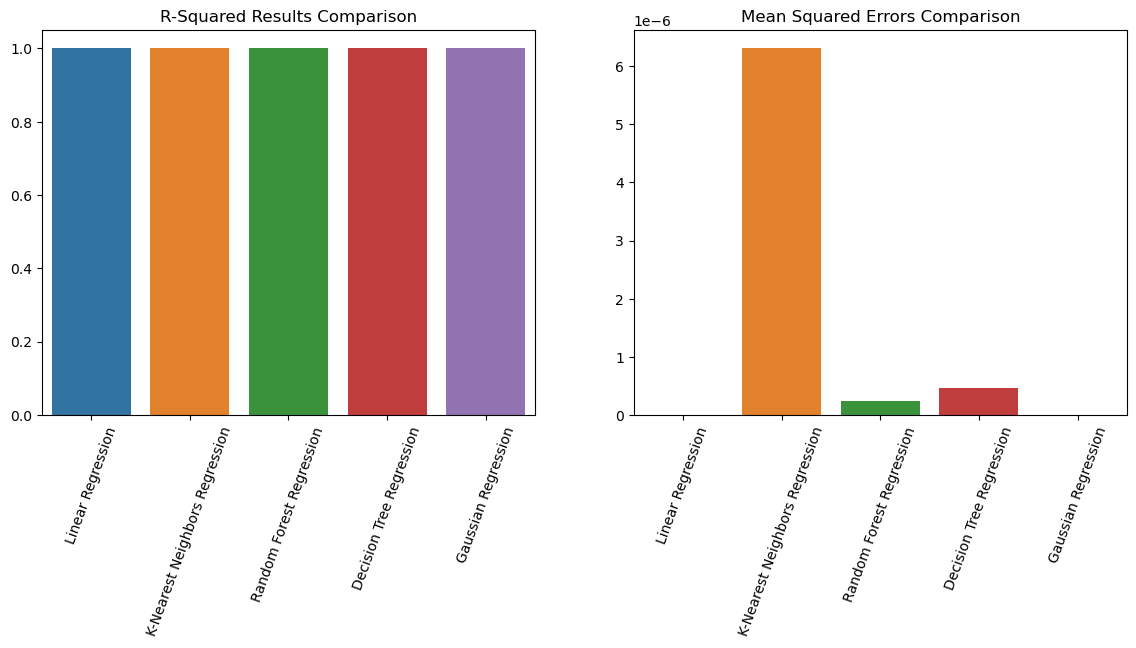

In [33]:
# Graphical representation of the models for comparison
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
ax = sns.barplot(r2_scores)
ax.set(title='R-Squared Results Comparison')
plt.xticks(rotation=70)

plt.subplot(1,2,2)
ax = sns.barplot(mse_scores)
ax.set(title='Mean Squared Errors Comparison')
plt.xticks(rotation=70)

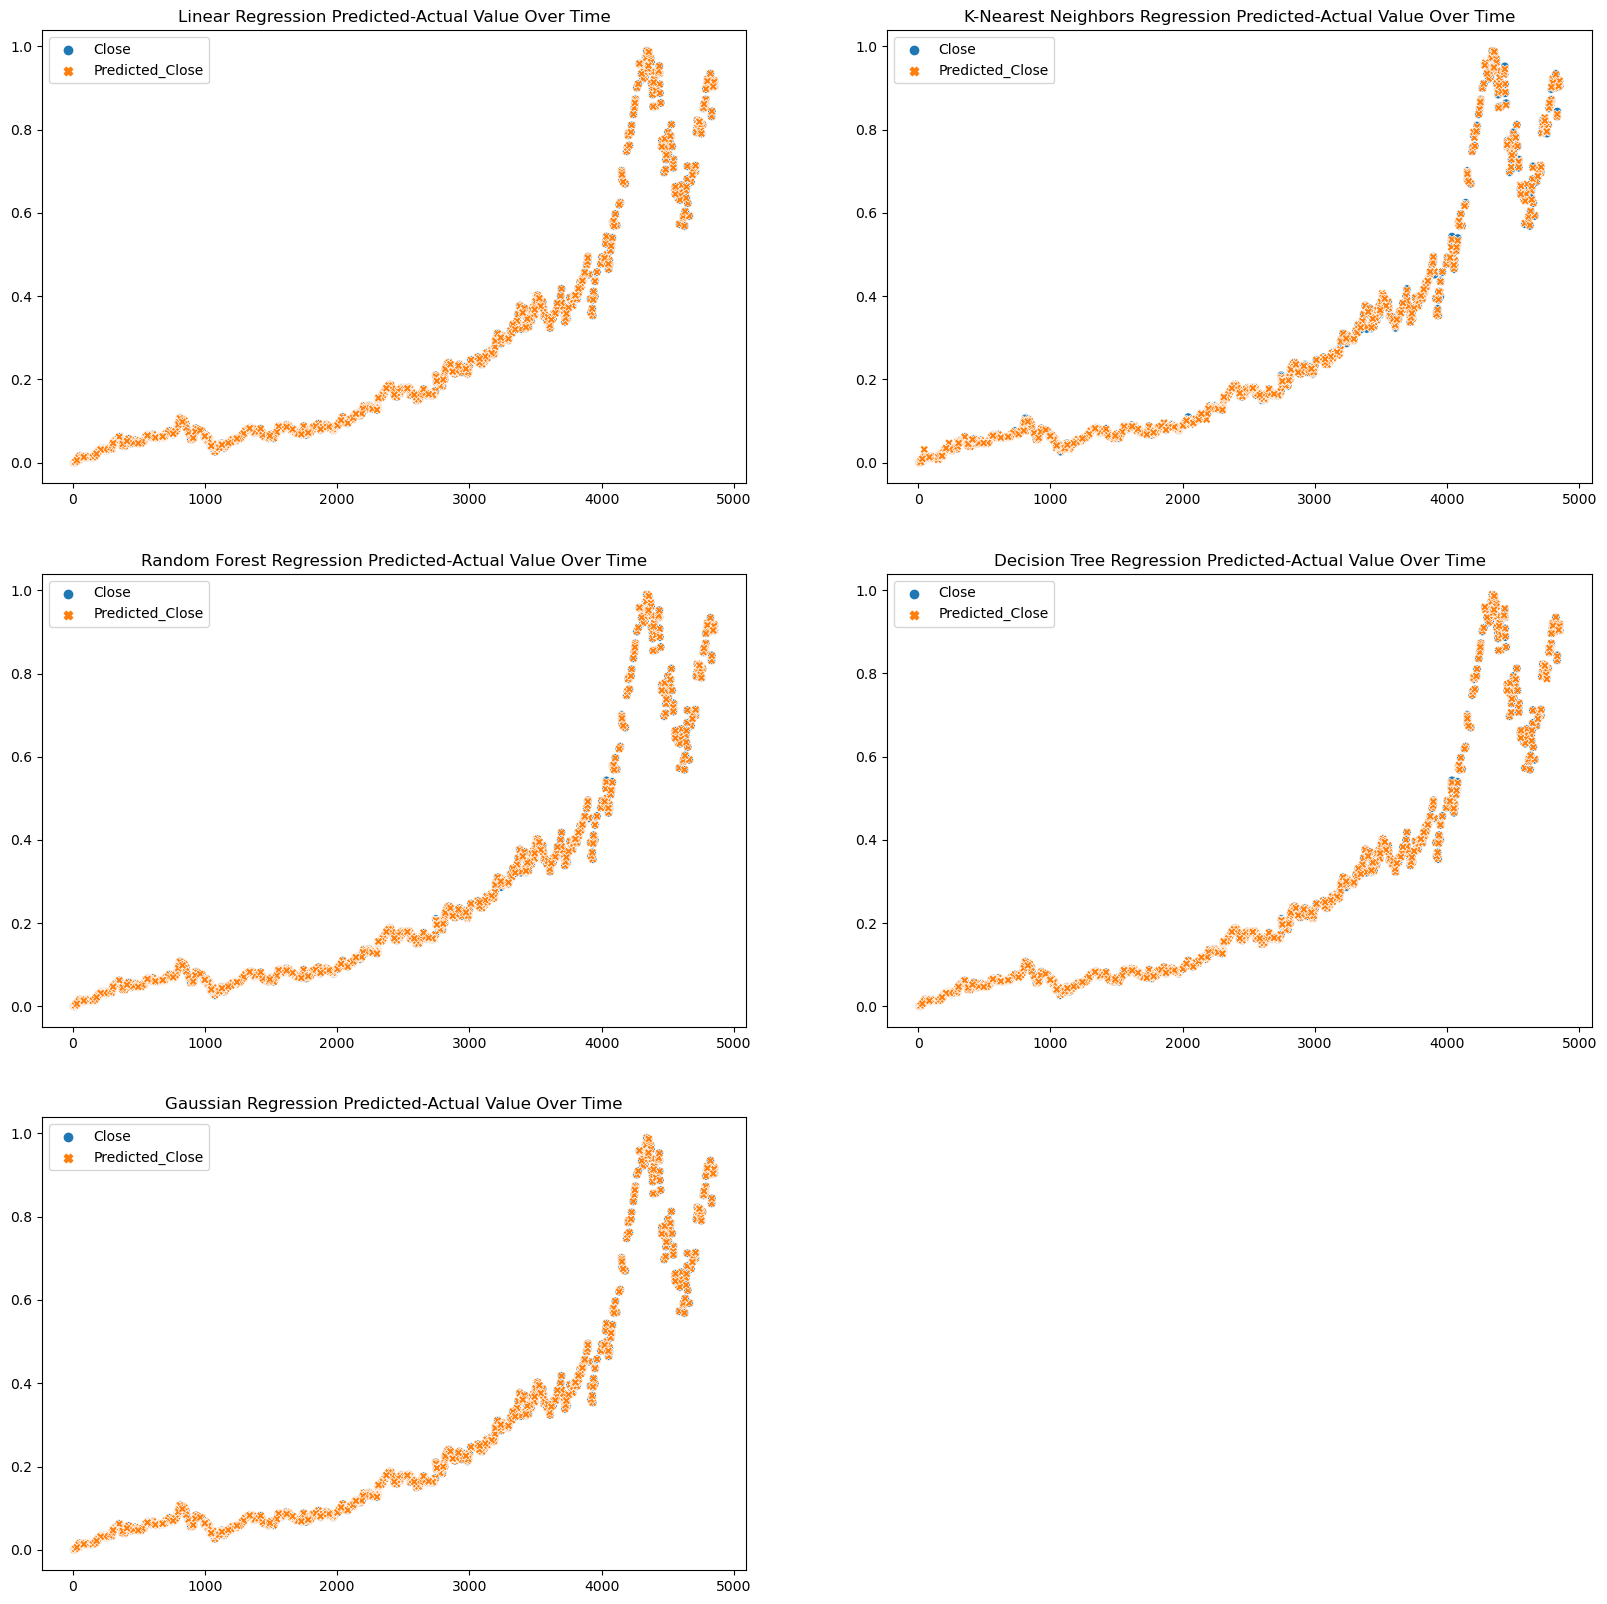

In [35]:
# Comparison of predicted and actual values
plt.figure(figsize=(20,20))
for i,j in enumerate(predictions): 
    df= test_y.copy(deep=True)
    df['Predicted_Close'] = predictions[j].values

    plt.subplot(3,2,i+1)
    ax = sns.scatterplot(df)
    ax.set(title=j+' Predicted-Actual Value Over Time')

---

<a id='assumption_control_section'></a>
## 4. Assumption Control

Linear Regression model is one of the best performed model. Hence, it is assumed as used model for assumption control step.

In [36]:
test_y_pred = lr_test_y
test_y_pred[:5]

array([[0.0880818 ],
       [0.13531126],
       [0.0831683 ],
       [0.06938897],
       [0.3594068 ]])

In [37]:
test_y_pred.shape

(972, 1)

In [38]:
test_y_pred = test_y_pred.reshape((972,1))

### 4.1. Linearity

[Text(0.5, 0, 'Predicted Values'),
 Text(0, 0.5, 'Residuals'),
 Text(0.5, 1.0, 'Predicted Values - Residual Errors Plot')]

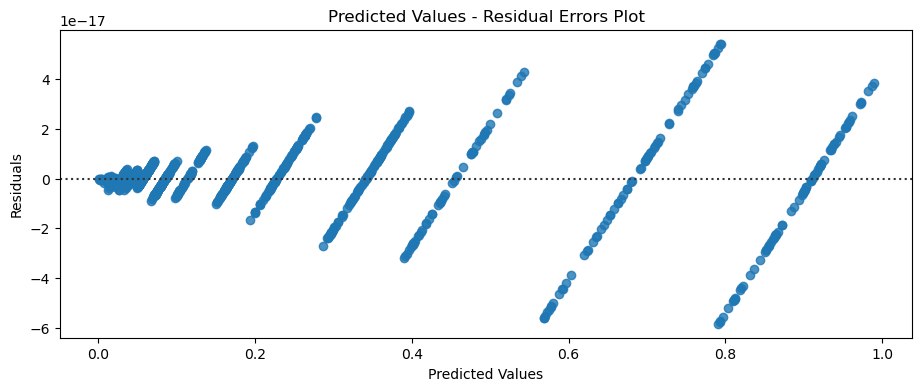

In [39]:
# Predicted Values - Residual Errors Plot

# residual calculation
# residuals = Actual Values - Predicted Values
residuals = test_y - test_y_pred

# residual plot
plt.figure(figsize=(11,4))
fig = sns.residplot(x=test_y_pred, y=residuals)
fig.set(xlabel='Predicted Values', ylabel='Residuals', title='Predicted Values - Residual Errors Plot')

As it can be seen from the Residual distribution over predicted values follows some kind of heterogeneous and funnel shaepd distribution. Thus, it can be said that the model might be applied on a dataset that can't perform well. However, the Linear Regression model is performed perfectly. Also, overfitting might be considered.

### 4.2. Autocorrelation

In [40]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

array([1.98026063])

Result of the Durbin-Watson Test is almost equal to 2. Thus, it can be said that there is **no autocorrelation** which meets the assumption.

### 4.3. Multicollinearity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF calculation
vif_df = pd.DataFrame()
vif_data = transformed_data.loc[:,['Open', 'High', 'Low', 'Close']]
vif_df['feature'] = vif_data.columns
vif_df['VIF'] = [variance_inflation_factor(vif_data.values, i) 
                 for i in range(len(vif_data.columns))]
vif_df

,feature,VIF
0,Open,23829.299698
1,High,27050.717733
2,Low,27389.902124
3,Close,23685.412673


Results of the **Variance Inflation Factor(VIF)** is more than 5. Thus, there is **multicollinearity**. However, model performed quite well. Therefore, reduction of the multicollinearity no required.

### 4.4. Heteroscedasticity

In [42]:
# Predicted Values - Residual Errors Plot

[Text(0.5, 0, 'Predicted Values'),
 Text(0, 0.5, 'Residuals'),
 Text(0.5, 1.0, 'Predicted Values - Residual Errors Plot')]

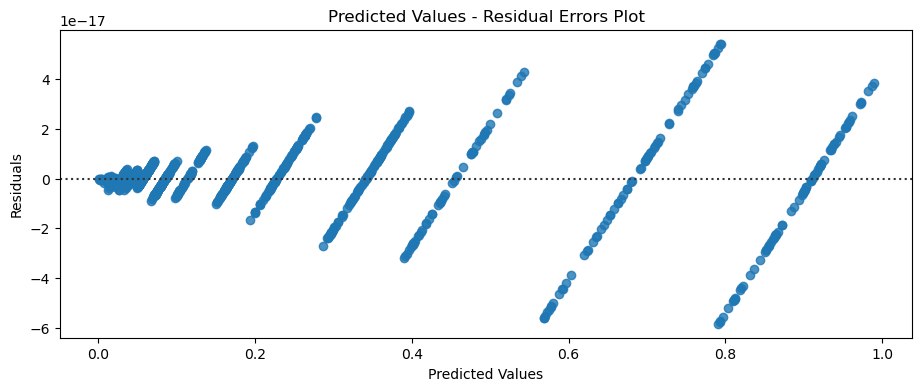

In [43]:
# residual plot
plt.figure(figsize=(11,4))
fig = sns.residplot(x=test_y_pred, y=residuals)
fig.set(xlabel='Predicted Values', ylabel='Residuals', title='Predicted Values - Residual Errors Plot')

In [44]:
# Breusch-Pagan Test

# importing libraries
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# create regression model
lr_model = smf.ols('Close ~ Open+High+Low+Adj_Close+Volume', data=transformed_data)

# fittin the regression model
lr_model = lr_model.fit()

# applying Breusch-Pagan Test on the linear regression model
test_result = sms.het_breuschpagan(lr_model.resid, lr_model.model.exog)

# arranging names of the test results
names = ['Lagrange Multiplier Statistic', 'Lagrange p-value', 'f-statistic', 'f-statistic p-value']
test_result = lzip(names, test_result)
test_result[1]

('Lagrange p-value', 0.0)

In [45]:
# White's Test

# importing libraries
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# create regression model
lr_model = smf.ols('Close ~ Open+High+Low+Adj_Close+Volume', data=transformed_data)

# fittin the regression model
lr_model = lr_model.fit()

# applying Breusch-Pagan Test on the linear regression model
test_result = sms.het_white(lr_model.resid, lr_model.model.exog)

# arranging names of the test results
names = ['Lagrange Multiplier Statistic', 'Lagrange p-value', 'f-statistic', 'f-statistic p-value']
test_result = lzip(names, test_result)
test_result[1]

('Lagrange p-value', 0.0)

As it can be seen from the funnel shaped **Residual-Predicted Values Plot** and result of the **Breusche-Pagan** and **White Tests**, it can be said that there is **heteroscadasticity**. Therefore, variance of the residuals might be needed reduced to a some kind of constant value instead of accelerating values. In order to eliminate heteroscedasticity, non-linear scaling might be considered such as log(y), √y, etc.

### 4.5. Residuals' Gaussian Distribution

In [46]:
import statsmodels.api as sm 

In [47]:
# Q-Q(Quantile-Quantile) Plots

<function matplotlib.pyplot.show(close=None, block=None)>

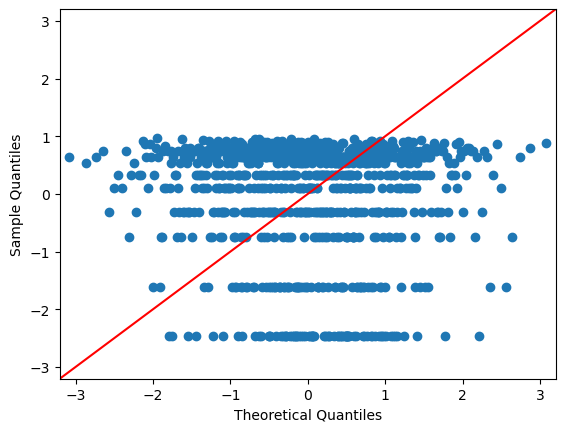

In [48]:
# QQ PLot For Residuals 
sm.qqplot(residuals, fit=True, line ='45')
plt.show # if this is not used then qqplot returns two identical plot

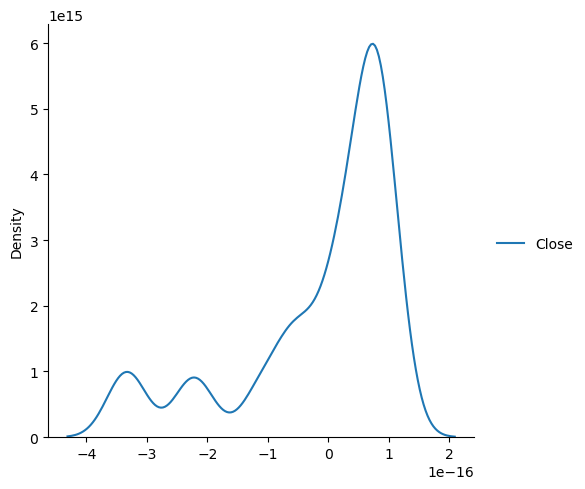

In [49]:
# Distribution PLot For Residuals
sns.displot(residuals, kind='kde')

In [50]:
# Shapiro-Wilk Test

from scipy.stats import shapiro

# Shapiro-Wilk Test For Residuals
shapiro(residuals)

ShapiroResult(statistic=0.7788757085800171, pvalue=2.873584332250134e-34)

As the results suggests, there data has no normal distribution.

---